In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [2]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('google_api.json', scope)

https://github.com/beoutbreakprepared/nCoV2019

https://github.com/midas-network/COVID-19

In [3]:
source_urls = ['https://docs.google.com/spreadsheets/d/1itaohdPiAeniCXNlntNztZ_oRvjh0HsGuJXUJWET008',
              'https://docs.google.com/spreadsheets/d/1nq0z5JjJo3ujwSDgtLmoOU7xUE1fvOn-k3YsK5_n1AQ']

In [15]:
gc = gspread.authorize(credentials)

wks = gc.open_by_url(source_urls[1]).get_worksheet(1)

data = wks.get_all_values()
headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)

In [18]:
df['gender'].value_counts()

          1697
male       837
female     650
20           1
Name: gender, dtype: int64

In [19]:
df_restr = df[df['gender'].isin(['male', 'female'])]
df_restr['age'].value_counts()

50    270
60    228
      228
40    186
30    164
70    157
20    140
80     57
10     31
90     13
0      13
Name: age, dtype: int64

In [50]:
df['geo_resolution'].value_counts()

admin2    9677
admin1    9327
point     2163
admin3    1117
           322
admin0     260
admin        1
Name: geo_resolution, dtype: int64

In [51]:
data = df[df['geo_resolution'].isin(['admin2', 'admin3', 'point'])]

In [53]:
data['outcome'].value_counts()

                                                  12720
discharge                                            82
stable                                               74
discharged                                           39
died                                                 20
death                                                10
recovered                                             3
Discharged from hospital                              2
released from quarantine                              2
Discharged                                            2
critical condition, intubated as of 14.02.2020        1
not hospitalized                                      1
recovering at home 03.03.2020                         1
Name: outcome, dtype: int64

array(['', 'https://www.mhlw.go.jp/stf/newpage_09079.html',
       'Asymptomatic but placed in quarantine: https://www.thestar.com.my/news/nation/2020/01/25/three-chinese-nationals-test-positive-for-coronavirus-in-m039sia-says-health-minister#.XiwrXIRMMhs.twitter',
       'https://laist.com/2020/01/26/coronavirus-orange-county-first-case-confirmed.php',
       'Most details from listening to LA County Public Health Dept Press Conference live',
       'http://wsjkw.cq.gov.cn/tzgg/20200127/249875.html',
       'https://mp.weixin.qq.com/s?__biz=MjM5MTg5OTM0Ng==&mid=2651448627&idx=1&sn=e26391f0e764bfd4fc2a9a1bc15502ff&chksm=bd53ce8e8a2447985560b9a62b2a5f567693ac25032b0209cc489c49d91862fd480e4664094e&token=566312186&lang=zh_CN#rd',
       'https://www.linguee.com/english-chinese/search?source=auto&query=%E8%A1%A2%E5%B7%9E%E5%B8%82',
       'Travel to Cebu and Dumaguete also',
       "Daughter of France's 4th case (80 year-old man); also diagnosed in Paris, https://www.lexpress.fr/actualite/

In [309]:
gc = gspread.authorize(credentials)

wks = gc.open_by_url(source_urls[1]).get_worksheet(0)

data = wks.get_all_values()
headers = data.pop(0)

df3 = pd.DataFrame(data, columns=headers)

In [319]:
df3[df3['sex'].isin(['male', 'female'])]['age'].value_counts()

      1206
50     163
30     150
40     150
60     143
20     138
70      62
10      41
80      17
0        9
90       6
Name: age, dtype: int64

In [317]:
df3[df3['outcome'].isin(['died', 'death'])]

,ID,age,sex,country,date_onset_symptoms,date_admission_hospital,date_confirmation,travel_history_location,source,outcome,...,disease_diabetes,disease_hypertension,disease_hypertriglyceridemia,disease_pre-existing conditions,disease_prostate hypertrophy,cluster,curated,in_cluster,weight,dummy_entry
0,192,30,male,Hong Kong,2020-01-21 0:00:00,2020-01-21 0:00:00,2020-01-22 0:00:00,Wuhan,https://www.hongkongfp.com/2020/01/22/breaking...,died,...,0,0,0,0,0,192,1,1,1,0
146,4870,40,male,Philippines,,,2020-02-01 0:00:00,Wuhan via Hong Kong,https://www.rappler.com/nation/250781-doh-seco...,died,...,0,0,0,1,0,0,1,0,1,0
801,11272,,female,Japan,2020-01-22 0:00:00,2020-02-01 0:00:00,2020-02-13 0:00:00,,https://www.mhlw.go.jp/stf/newpage_09503.html,death,...,0,0,0,0,0,-1,0,0,1,0
844,11321,,male,Taiwan,2020-01-27 0:00:00,2020-02-03 0:00:00,2020-02-15 0:00:00,,https://www.cdc.gov.tw/Bulletin/Detail/C7Sfkry...,death,...,1,0,0,0,0,1060,0,1,1,0
948,11498,,,Iran,,,2020-02-19 0:00:00,,https://www.channelnewsasia.com/news/world/cov...,death,...,0,0,0,0,0,-1,0,0,1,0
949,11499,,,Iran,,,2020-02-19 0:00:00,,https://www.channelnewsasia.com/news/world/cov...,death,...,0,0,0,0,0,-1,0,0,1,0
972,11525,70,female,Italy,,,2020-02-21 0:00:00,,https://milano.corriere.it/notizie/cronaca/20_...,death,...,0,0,0,0,0,-1,0,0,1,0
973,11526,70,male,Italy,,,2020-02-21 0:00:00,,https://www.corriere.it/cronache/20_febbraio_2...,death,...,0,0,0,0,0,-1,0,0,1,0
975,11528,60,female,Italy,,,2020-02-21 0:00:00,,https://www.ansa.it/canale_saluteebenessere/no...,death,...,0,0,0,0,0,-1,0,0,1,0
1376,12102,,,United States,,,2020-03-07 0:00:00,,https://www.seattletimes.com/seattle-news/heal...,died,...,0,0,0,0,0,-1,0,0,1,0


In [76]:
df['outcome'].value_counts()

                                                                            22601
discharge                                                                      95
stable                                                                         78
discharged                                                                     42
died                                                                           21
death                                                                          14
released from quarantine                                                        3
recovered                                                                       3
Discharged from hospital                                                        2
Discharged                                                                      2
not hospitalized                                                                1
Symptoms only improved with cough. Currently hospitalized for follow-up.        1
critical conditi

In [247]:
df2 = pd.read_csv('data/demographics.csv')

In [248]:
ages2 = ['<1 year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95 plus']

In [249]:
df2_restr = df2[df2['age_group_name'].isin(ages2) &
                (df2['location_name'] == 'Global') &
                df2['sex_name'].isin(['Female', 'Male']) &
                (df2['year_id'] == 2017)].drop_duplicates(subset=['sex_name', 'age_group_name'])

In [250]:
def age_map2(age_str):
    if age_str == '<1 year':
        return '0-9'
    elif age_str == '95 plus':
        return '90-99'
    else:
        age_int = int(age_str)
        range_lower = 10 * (age_int // 10)
        return f'{range_lower}-{range_lower + 9}'

In [290]:
df2A = df2_restr.drop(['location_id', 'location_name',
                       'sex_id', 'age_group_id',
                       'year_id', 'measure_id',
                       'measure_name', 'metric_name'], axis=1).copy()
df2A['age_group_name'] = df2A['age_group_name'].apply(age_map2)

df2_agg = df2A.groupby(['sex_name', 'age_group_name']).sum().reset_index()

df2_agg['percent'] = df2_agg['val'] / df2_agg['val'].sum()

df2_agg

,sex_name,age_group_name,val,upper,lower,percent
0,Female,0-9,6.483978e+08,6.654426e+08,6.309967e+08,0.084864
1,Female,10-19,6.080017e+08,6.249492e+08,5.907995e+08,0.079577
2,Female,20-29,6.049959e+08,6.234795e+08,5.854614e+08,0.079183
3,Female,30-39,5.514185e+08,5.683208e+08,5.330967e+08,0.072171
4,Female,40-49,4.783519e+08,4.944466e+08,4.606017e+08,0.062608
5,Female,50-59,3.888832e+08,4.022849e+08,3.744190e+08,0.050898
6,Female,60-69,2.825222e+08,2.922309e+08,2.719961e+08,0.036977
7,Female,70-79,1.574934e+08,1.623357e+08,1.522769e+08,0.020613
8,Female,80-89,7.271492e+07,7.474255e+07,7.053311e+07,0.009517
9,Female,90-99,1.317540e+07,1.351907e+07,1.281680e+07,0.001724


In [265]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

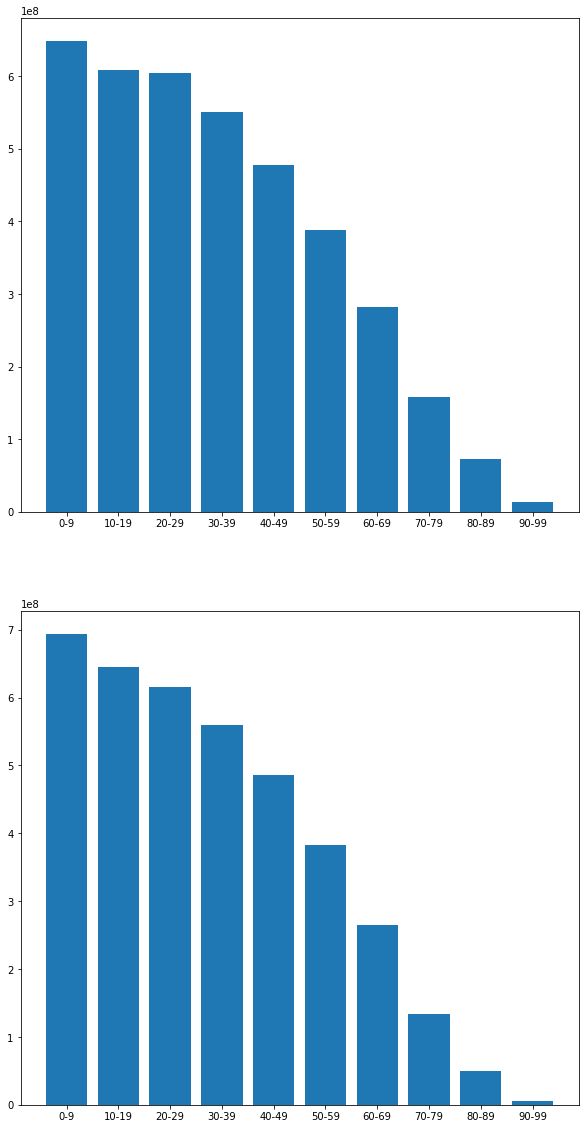

In [271]:
fig, axes = plt.subplots(2, 1, figsize=(10,20))

age_ranges_female = df2_agg[df2_agg['sex_name'] == 'Female']['age_group_name']
pop_female = df2_agg[df2_agg['sex_name'] == 'Female']['val']
              
axes[0].bar(x=age_ranges_female, height=pop_female)

age_ranges_male = df2_agg[df2_agg['sex_name'] == 'Male']['age_group_name']
pop_male = df2_agg[df2_agg['sex_name'] == 'Male']['val']
              
axes[1].bar(x=age_ranges_male, height=pop_male)

In [220]:
df4 = pd.read_csv('data/outside_Hubei.csv')

/home/james/Django/project001/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,22,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [221]:
df4.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials'],
      dtype='object')

In [242]:
ages = [str(age) for age in range(1,100)] + ['0-10', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

def age_map(age_str):
    if age_str == '0-10':
        return '0-9'
    elif '-' in age_str:
        return age_str
    else:
        age_int = int(age_str)
        range_lower = 10 * (age_int // 10)
        return f'{range_lower}-{range_lower + 9}'

In [299]:
df4_agg = df4[~df4.age.isna() & df4.age.isin(ages)].copy()
df4_agg['sex'] = df4_agg['sex'].apply(lambda x: 'Male' if x == 'male' else 'Female')
df4_agg['age'] = df4_agg['age'].apply(age_map)
df4_agg = df4_agg[['age', 'sex']]
df4_agg['count'] = 1
df4_agg = df4_agg.groupby(['age', 'sex']).sum()
df4_agg['percent'] = df4_agg['count'] / df4_agg['count'].sum()
df4_agg = df4_agg.sort_values(['sex', 'age']).reset_index()
df4_agg

,age,sex,count,percent
0,0-9,Female,11,0.005340
1,10-19,Female,25,0.012136
2,20-29,Female,121,0.058738
3,30-39,Female,186,0.090291
4,40-49,Female,169,0.082039
5,50-59,Female,190,0.092233
6,60-69,Female,154,0.074757
7,70-79,Female,71,0.034466
8,80-89,Female,25,0.012136
9,90-99,Female,7,0.003398


In [302]:
df4_agg['risk_factor'] = df4_agg['percent'] / df2_agg['percent']
df4_agg

,age,sex,count,percent,risk_factor
0,0-9,Female,11,0.005340,0.062922
1,10-19,Female,25,0.012136,0.152506
2,20-29,Female,121,0.058738,0.741798
3,30-39,Female,186,0.090291,1.251078
4,40-49,Female,169,0.082039,1.310364
5,50-59,Female,190,0.092233,1.812120
6,60-69,Female,154,0.074757,2.021719
7,70-79,Female,71,0.034466,1.672048
8,80-89,Female,25,0.012136,1.275173
9,90-99,Female,7,0.003398,1.970547


In [ ]:
ages_ranges = [f'{x}-{x+9}' for x in range(10)]

risk_factor = {'Female' : {age_range : df4_aggb}

In [320]:
df5 = df4_agg[['age', 'sex', 'risk_factor']].set_index(['sex', 'age'])
df5.to_csv('risk_factor.csv')